# MALIGNANT COMMENTS CLASSIFICATION

### Problem Statement
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 



### Data Set Description
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. You need to build a model that can differentiate between comments and its categories.

In [1]:
#!pip install scikit-multilearn

In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



from scipy import interp
import scikitplot as skplt
from itertools import cycle
import matplotlib.ticker as plticker

import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, regexp_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.sparse import csr_matrix

import timeit, sys
from sklearn import metrics
import tqdm.notebook as tqdm
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import hamming_loss, log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix
from scikitplot.metrics import plot_roc_curve

Importing all the necessary libraries/packages here.

In [3]:
df_train = pd.read_csv('train.csv')
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \r\n\r\nThat...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \r\n\r\nUmm, theres no actual article ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


Here we are taking a look at our training dataset and can see that the dataframe has a total of 1,59,571 rows and 8 columns. We don't see any importance of the id column however the comment column helps us label through the remaining columns in binary labels.

In [4]:
df_test = pd.read_csv('test.csv')
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \r\n\r\n The title is fine as i...
2,00013b17ad220c46,""" \r\n\r\n == Sources == \r\n\r\n * Zawe Ashto..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \r\n i totally agree, this stuff is nothing ..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \r\n...
153161,fffda9e8d6fafa9e,""" \r\n\r\n == Okinotorishima categories == \r\..."
153162,fffe8f1340a79fc2,""" \r\n\r\n == """"One of the founding nations of..."


After checking through the tarining data when we take a look at the testing dataset we see that there are 1,53,164 rows and only 2 columns present in this dataframe. This gives us the idea that we will need to create additional columns to mark the comments into various categories as per our model confidence. Once again the id column does not seem to offer any significance and can be removed.


# Exploratory Data Analysis

In [5]:
print("We have {} Rows and {} Columns in our dataframe".format(df_train.shape[0], df_train.shape[1]))
df_train.head(20)

We have 159571 Rows and 8 Columns in our dataframe


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\r\n\r\nCongratulations from me as well, use ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


We can see that our training dataframe consists of 159571 rows and 8 columns in total.

Column Description:
- id : A unique id aligned with each comment text. 
- comment_text : It includes the comment text. 
- malignant : It is a column with binary values depicting which comments are malignant in nature. 
- highly_malignant : Binary column with labels for highly malignant text. 
- rude : Binary column with labels for comments that are rude in nature. 
- threat : Binary column with labels for threatening context in the comments. 
- abuse : Binary column with labels with abusive behaviour.
- loathe : Label to comments that are full of loathe and hatred.



In [6]:
df_train.isna().sum() # checking for missing values

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

Using the `isna` and `sum` options together we can confirm that there are no missing values in any of the columns present in our training dataset.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Using the `info` method we are able to confirm the non null count details as well as the datatype information. We have a total of 8 columns out of which 2 columns have object datatype while the remaining 6 columns are of integer datatype.

In [8]:
# checking ratio of data which contains malignant comments and normal or unoffensive comments.
output_labels = df_train.columns[2:]

# counting non-zero rows i.e. Malignant Comments
malignant_comments = len(df_train[df_train[output_labels].any(axis=1)])

# counting rows containing zero i.e. Normal Comments
normal_comments = len(df_train)-malignant_comments

print(f"Total Malignant Comments: {malignant_comments} ({round(malignant_comments*100/len(df_train),2)}%)")
print(f"Total Normal Comments: {normal_comments} ({round(normal_comments*100/len(df_train),2)}%)")

Total Malignant Comments: 16225 (10.17%)
Total Normal Comments: 143346 (89.83%)


Above ratio shows that our dataframe consists **10.17%** of Malignant Comments and **89.83%** of Normal Comments. Hence, it is clear that the dataset is imbalanced and needs to be treated accordingly during train test split of model training.

In [9]:
# checking the length of comments and storing it into another column 'original_length'
# copying df_train into another object df
df = df_train.copy()
df['original_length'] = df.comment_text.str.len()

# checking the first five and last five rows here
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0,265
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0,626
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,297
159567,ffea4adeee384e90,You should be ashamed of yourself \r\n\r\nThat...,0,0,0,0,0,0,101
159568,ffee36eab5c267c9,"Spitzer \r\n\r\nUmm, theres no actual article ...",0,0,0,0,0,0,83
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


I have added an additional column to store the original length of our comment_text column

In [10]:
# Data Cleansing

# as the feature 'id' has no relevance w.r.t. model training I am dropping this column
df.drop(columns=['id'],inplace=True)
# converting comment text to lowercase format
df['comment_text'] = df.comment_text.str.lower()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,explanation\r\nwhy the edits made under my use...,0,0,0,0,0,0,265
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,"""\r\nmore\r\ni can't make any real suggestions...",0,0,0,0,0,0,626
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


Since there was no use of the "id" column I have dropped it and converted all the text data in our comment text column into lowercase format for easier interpretation

In [11]:
# Removing and Replacing unwanted characters in the comment_text column

# Replacing '\n' with ' '
df.comment_text = df.comment_text.str.replace('\n',' ')

# Keeping only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc
df.comment_text = df.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

# Removing Stop Words and Punctuations

# Getting the list of stop words of english language as set
stop_words = set(stopwords.words('english'))

# Updating the stop_words set by adding letters from a to z
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
    
# Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

# Checking the new list of stop words
print("New list of custom stop words are as follows:\n\n")
print(stop_words)

New list of custom stop words are as follows:


{'hadn', 'lmk', 'too', 'o', 'under', 'didn', 'or', 'x', "d'aww", 'is', 'does', 'all', 'hmm', 'itself', 'no', "won't", 'during', 'won', "that'll", "shan't", 'which', 'hasn', 'couldn', 'and', "doesn't", 'am', 'z', 'some', 'nor', 'f', 'his', "wasn't", 'for', 'bbq', 'w', 'their', 'yours', 'are', 'did', 'maybe', 'nt', 've', "hasn't", 'be', 't', 'm', 'those', 'not', 'had', 'to', 'ain', 'off', 'yourselves', 'themselves', 'ily', 'my', 'against', 'yolo', 'if', 'should', 'such', "there's", 'it', 'been', "wouldn't", 'just', "don't", 'c', 'll', 'where', 'ok', "i've", 'what', 'from', 'haven', 'd', 'very', 'r', "mightn't", 'than', 'omg', 'how', 'herself', 'that', 'umm', 'your', 'each', 'n', "should've", 'heh', 'can', 'has', 'out', 'there', 's', 'will', 'having', 'have', "that's", 'oh', 'again', 'on', 'v', 'we', 'ma', 'because', 'weren', "you'd", 'y', 'above', "i'm", "he's", 'mr', 'so', 'through', 'e', 'theirs', 'after', 'only', 'also', 'yourself', 'fur

In [12]:
# Removing stop words
df.comment_text = df.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

# Removing punctuations
df.comment_text = df.comment_text.str.replace("[^\w\d\s]","")

# Checking any 10 random rows to see the applied changes
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
61425,talking gyan sense either make sense talk holla,0,0,0,0,0,0,119
110054,know tried vandalize past two minutes find vie...,1,0,1,0,1,0,157
107750,original work von neumann imho book article vo...,0,0,0,0,0,0,154
7250,proves point thanks pope work improving articl...,0,0,0,0,0,0,286
118279,map state palestine,0,0,0,0,0,0,31
21139,regarding fred ottman see wp linkstyle says pr...,0,0,0,0,0,0,171
27772,done would even name known time hc,0,0,0,0,0,0,89
155200,academic article predates talking heads months...,0,0,0,0,0,0,280
111512,way beautiful photos,0,0,0,0,0,0,31
89935,terrorist something applied blockers free spee...,1,0,1,0,1,0,262


In [13]:
# Stemming words
snb_stem = SnowballStemmer('english')
df.comment_text = df.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

# Checking any 10 random rows to see the applied changes
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
79782,zafarn rn punjabi persian hindi lit epistl vic...,0,0,0,0,0,0,2257
101795,phrase seen anoth flare lit tipoff eschew,0,0,0,0,0,0,69
48403,sir nicosia turkish municip nicosia articl mak...,0,0,0,0,0,0,405
31831,decid creat page wikipedia better late never,0,0,0,0,0,0,83
43417,ip current block zoe eras remark talk page vio...,0,0,0,0,0,0,141
135538,marc shell book polio aftermath harvard make c...,0,0,0,0,0,0,331
131384,rememb happen summer think would make great ad...,0,0,0,0,0,0,229
89830,would introduc economi work two thee admin reg...,0,0,0,0,0,0,558
40727,stupid ass fucker retard whore incompet loser ...,1,1,1,0,1,0,104
17856,open page last paragraph say nayar matrilin ca...,0,0,0,0,0,0,404


In [14]:
# Checking the length of comment_text after cleaning and storing it in cleaned_length variable
df["cleaned_length"] = df.comment_text.str.len()

# Taking a loot at first 10 rows of data
df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length,cleaned_length
0,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,265,135
1,match background colour seem stuck thank talk ...,0,0,0,0,0,0,112,57
2,man realli tri edit war guy constant remov rel...,0,0,0,0,0,0,233,112
3,make real suggest improv wonder section statis...,0,0,0,0,0,0,626,310
4,sir hero chanc rememb page,0,0,0,0,0,0,67,26
5,congratul well use tool well talk,0,0,0,0,0,0,67,33
6,cocksuck piss around work,1,1,1,0,1,0,44,25
7,vandal matt shirvington articl revert pleas ban,0,0,0,0,0,0,115,47
8,sorri word nonsens offens anyway intend write ...,0,0,0,0,0,0,472,235
9,align subject contrari dulithgow,0,0,0,0,0,0,70,32


In [15]:
# Now checking the percentage of length cleaned
print(f"Total Original Length        : {df.original_length.sum()}")
print(f"Total Cleaned Length         : {df.cleaned_length.sum()}")
print(f"Percentage of Length Cleaned : {(df.original_length.sum()-df.cleaned_length.sum())*100/df.original_length.sum()}%")

Total Original Length        : 63295367
Total Cleaned Length         : 34297506
Percentage of Length Cleaned : 45.813560098324416%


# Visualization

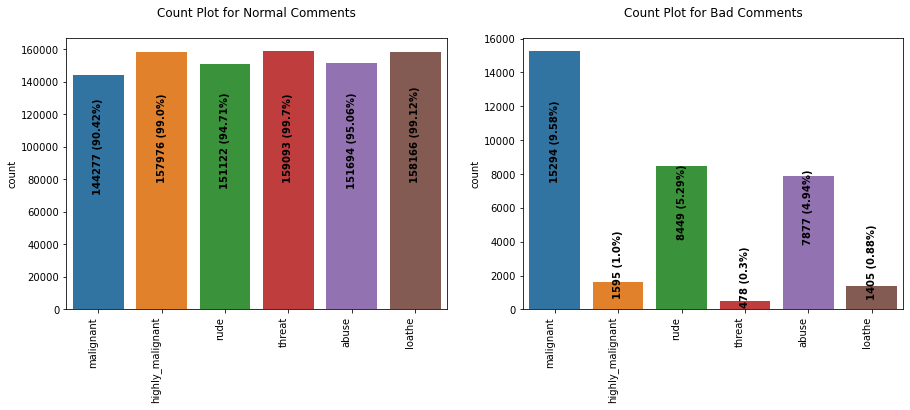

In [16]:
# comparing normal comments and bad comments using count plot

fig, ax = plt.subplots(1,2,figsize=(15,5))

for i in range(2):
    sns.countplot(data=df[output_labels][df[output_labels]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot for Normal Comments\n")
    else:
        ax[i].set_title("Count Plot for Bad Comments\n")
        
    ax[i].set_xticklabels(output_labels, rotation=90, ha="right")
    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(df),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center", fontweight="bold")
        p += 1

plt.show()

Observation:
- Dataset consists of higher number of Normal Comments than Bad or Malignant Comments. Therefore, it is clear that dataset is imbalanced and needs to be handle accordingly.
- Most of the bad comments are of type `malignant` while least number of type `threat` is present in dataset.
- Majority of bad comments are of type `malignant`, `rude` and `abuse`.

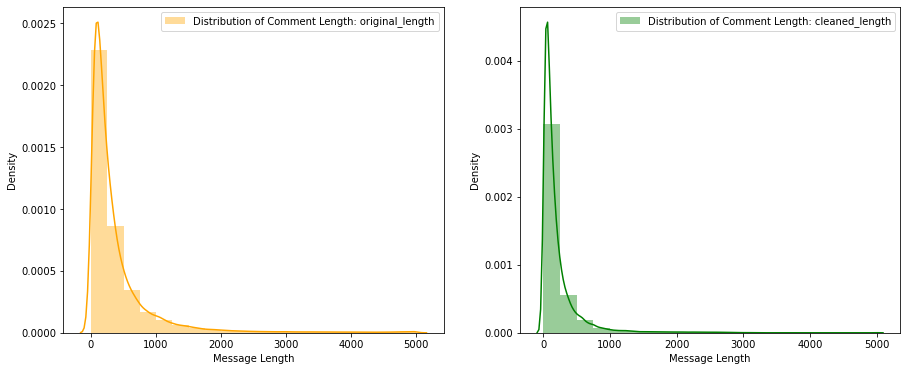

In [17]:
# Comparing the comment text length distribution before cleaning and after cleaning

fig, ax = plt.subplots(1,2,figsize=(15,6))
j=0
colors = ['orange','green']
for i in df.columns[-2:]:
    label_text = f"Distribution of Comment Length: {i}"
    sns.distplot(df[i],ax=ax[j],bins=20,color=colors[j],label=label_text)
    ax[j].set_xlabel("Message Length")
    ax[j].legend()
    j += 1
    
plt.show()

Observation:
- Before cleaning comment_text column most of the comment's length lies between 0 to 1100 while after cleaning it has been reduced between 0 to 900.

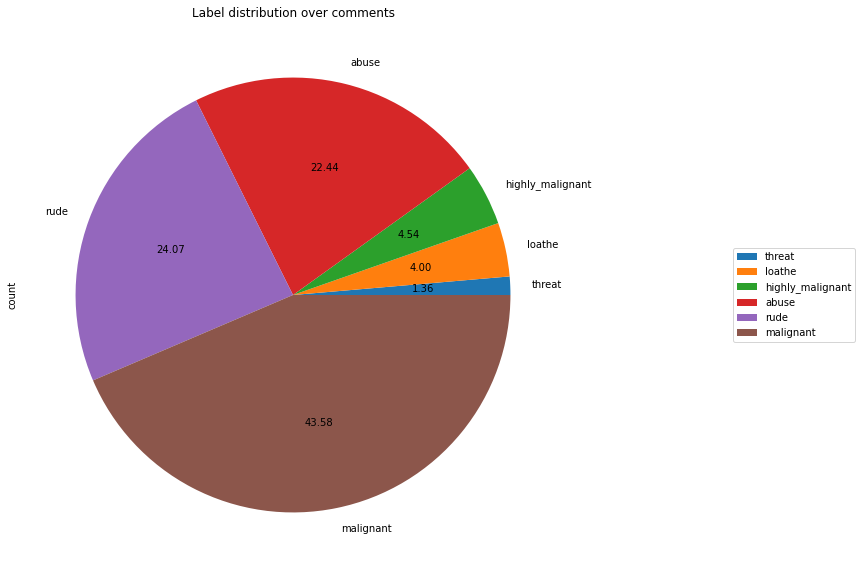

In [18]:
# Visualizing the label distribution of comments using pie chart

comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df_train[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (15, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

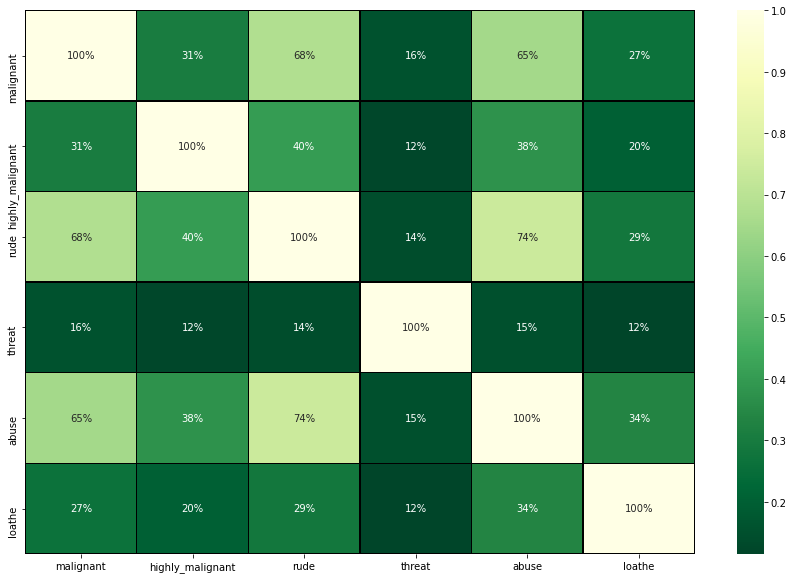

In [19]:
# Plotting heatmap for visualizing the correlation

plt.figure(figsize=(15, 10))
corr = df_train.corr() # corr() function provides the correlation value of each column
sns.heatmap(corr, linewidth=0.5, linecolor='black', fmt='.0%', cmap='YlGn_r', annot=True)
plt.show()

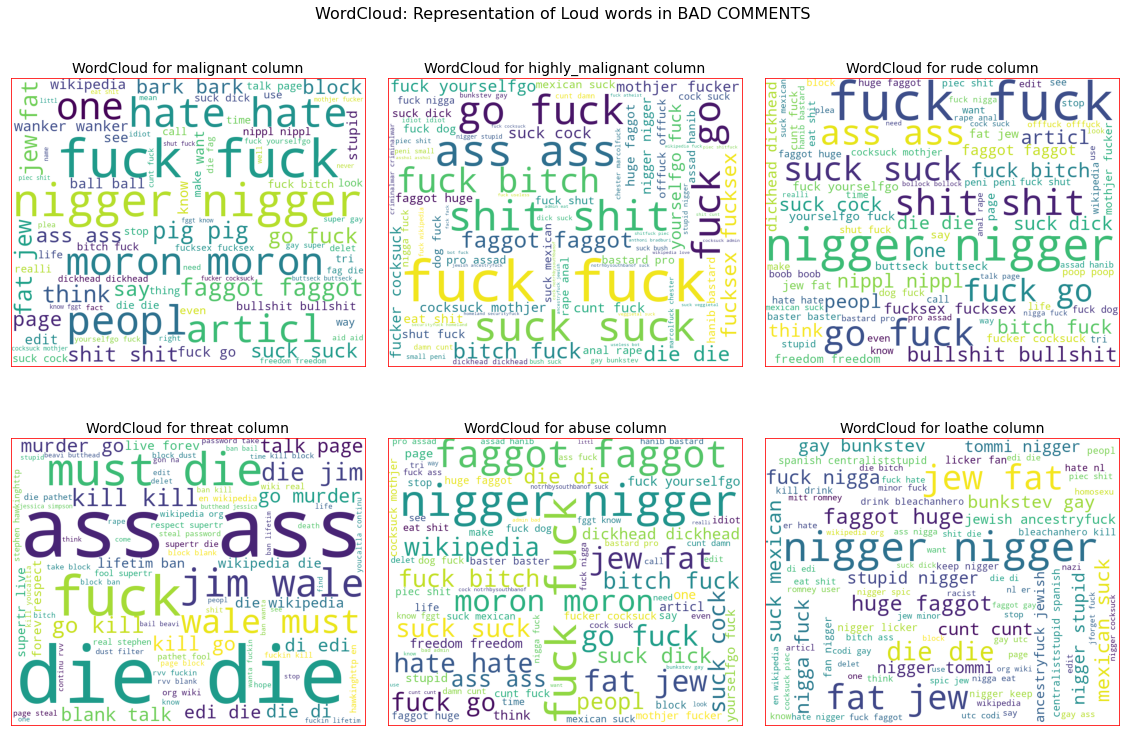

In [20]:
# WordCloud: Getting sense of loud words in each of the output labels.

cols = 3
rows = len(output_labels)//cols
if len(output_labels) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(16,rows*cols*1.8))
fig.subplots_adjust(top=0.8, hspace=0.3)

p=1
for i in output_labels:
    word_cloud = WordCloud(height=650, width=800,
                           background_color="white",max_words=80).generate(' '.join(df.comment_text[df[i]==1]))
    ax = fig.add_subplot(rows,cols,p)
    ax.imshow(word_cloud)
    ax.set_title(f"WordCloud for {i} column",fontsize=14)
    for spine in ax.spines.values():
        spine.set_edgecolor('r')
       
    ax.set_xticks([])
    ax.set_yticks([])
    p += 1

fig.suptitle("WordCloud: Representation of Loud words in BAD COMMENTS",fontsize=16)
fig.tight_layout(pad=2)
plt.show()

Observation:
- From wordcloud of `malignant comments`, it is clear that it mostly consists of words like fuck, nigger, moron, hate, suck ect.
- From wordcloud of `highly_malignant comments`, it is clear that it mostly consists of words like ass, fuck, bitch, shit, die, suck, faggot ect.
- From wordcloud of `rude comments`, it is clear that it mostly consists of words like nigger, ass, fuck, suck, bullshit, bitch etc.
- From wordcloud of `threat comments`, it is clear that it mostly consists of words like die, must die, kill, murder etc.
- From wordcloud of `abuse comments`, it is clear that it mostly consists of words like moron, nigger, fat, jew, bitch etc.
- From wordcloud of `loathe comments`, it is clear that it mostly consists of words like nigga, stupid, nigger, die, gay cunt etc.

# Data Preparation for Model Training and Testing

In [ ]:
# 1. Convert text to Vectors

# Converting text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000)
features = tfidf.fit_transform(df.comment_text).toarray()

# Checking the shape of features
features.shape

In [22]:
# 2. Seperating Input and Output Variables

# input variables
X = features

# output variables
Y = csr_matrix(df[output_labels]).toarray()

# checking shapes of input and output variables to take care of data imbalance issue
print("Input Variable Shape:", X.shape)
print("Output Variable Shape:", Y.shape)

Input Variable Shape: (159571, 4000)
Output Variable Shape: (159571, 6)




# Classification Machine Learning Model building

In [23]:
# 3. Training and Testing Model on our train dataset

# Creating a function to train and test model
def build_models(models,x,y,test_size=0.33,random_state=42):
    # spliting train test data using train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    
    # training models using BinaryRelevance of problem transform
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(x_train,y_train)
        
        print("Testing: ")
        predict_y = br_clf.predict(x_test)
        
        ham_loss = hamming_loss(y_test,predict_y)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(y_test,predict_y)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(y_test,predict_y)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = predict_y
        models[i]["time_taken"] = end_time - start_time
                      
        sys.stdout.write("\n=======================================================================================\n")
    
    models["x_train"] = x_train
    models["y_train"] = y_train
    models["x_test"] = x_test
    models["y_test"] = y_test
    
    return models

In [24]:
# Preparing the list of models for classification purpose
models = {"MultinomialNB": {"name": MultinomialNB()},
          "Logistic Regression": {"name": LogisticRegression()},
          "Random Forest Classifier": {"name": RandomForestClassifier()},
          "Support Vector Classifier": {"name": LinearSVC(max_iter = 3000)},
          "Decision Tree Classifier": {"name": DecisionTreeClassifier()},
         }

# Taking one forth of the total data for training and testing purpose
half = len(df)//4
trained_models = build_models(models,X[:half,:],Y[:half,:])

Building Models:   0%|          | 0/5 [00:03<?, ?it/s]


Current Model in Progress: MultinomialNB 
Training:  BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.024091657171793898
	Accuracy Score: 0.9074060007595898
              precision    recall  f1-score   support

           0       0.94      0.48      0.63      1281
           1       1.00      0.01      0.01       150
           2       0.93      0.45      0.60       724
           3       0.00      0.00      0.00        44
           4       0.84      0.35      0.49       650
           5       0.00      0.00      0.00       109

   micro avg       0.91      0.39      0.55      2958
   macro avg       0.62      0.21      0.29      2958
weighted avg       0.87      0.39      0.53      2958
 samples avg       0.04      0.03      0.04      2958
Completed in [16.75362487199982 sec.]

Current Model in Progress: Logistic Regression 
Training:  BinaryRelevance(classifier=LogisticRegression(), require_dense=[True, True])
Testing: 

	Hammin

From the above model comparision it is clear that **Linear Support Vector Classifier** performs better with **Accuracy Score: 91.35586783137106%** and **Hamming Loss: 1.9977212305355107%** than the other classification models. Therefore I am now going to use Linear Support Vector Classifier for further Hyperparameter tuning process.



# Hyperparameter Tuning

In [25]:
# Choosing Linear Support Vector Classifier model

fmod_param = {'estimator__penalty' : ['l1', 'l2'],
              'estimator__loss' : ['hinge', 'squared_hinge'],
              'estimator__multi_class' : ['ovr', 'crammer_singer'],
              'estimator__random_state' : [42, 72, 111]
             }
SVC = OneVsRestClassifier(LinearSVC())
GSCV = GridSearchCV(SVC, fmod_param, cv=3)
x_train,x_test,y_train,y_test = train_test_split(X[:half,:], Y[:half,:], test_size=0.30, random_state=42)
GSCV.fit(x_train,y_train)
GSCV.best_params_

{'estimator__loss': 'hinge',
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': 42}

After comparing all the classification models I have selected `Linear Support Vector Classifier` as my best model and have listed down it's parameters above referring the sklearn webpage. I am using the Grid Search CV method for hyper parameter tuning my best model. I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes. So the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model that I can use on my final model.

In [26]:
Final_Model = OneVsRestClassifier(LinearSVC(loss='hinge', multi_class='ovr', penalty='l2', random_state=42))
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)
h_loss = hamming_loss(y_test,fmod_pred)*100
print("Hamming loss for the Best Model is:", h_loss)

Accuracy score for the Best Model is: 91.51069518716578
Hamming loss for the Best Model is: 1.9593917112299464


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# AUC ROC Curve for Final Model

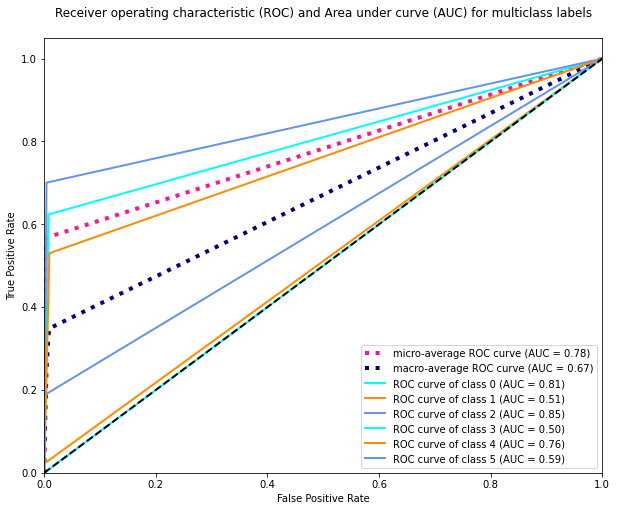

In [27]:
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], fmod_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), fmod_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (ROC) and Area under curve (AUC) for multiclass labels\n")
plt.legend(loc="lower right")
plt.show()

I have generated the ROC Curve for my final model and it shows separate curve for every class present in our multi label target variable along with it's AUC values.

# Confusion Matrix for Final Model

In [28]:
print("Confusion matrix:\n\n", multilabel_confusion_matrix(y_test, fmod_pred))

Confusion matrix:

 [[[10710    83]
  [  442   733]]

 [[11832     1]
  [  132     3]]

 [[11263    47]
  [  197   461]]

 [[11930     0]
  [   38     0]]

 [[11266   106]
  [  280   316]]

 [[11869     3]
  [   78    18]]]


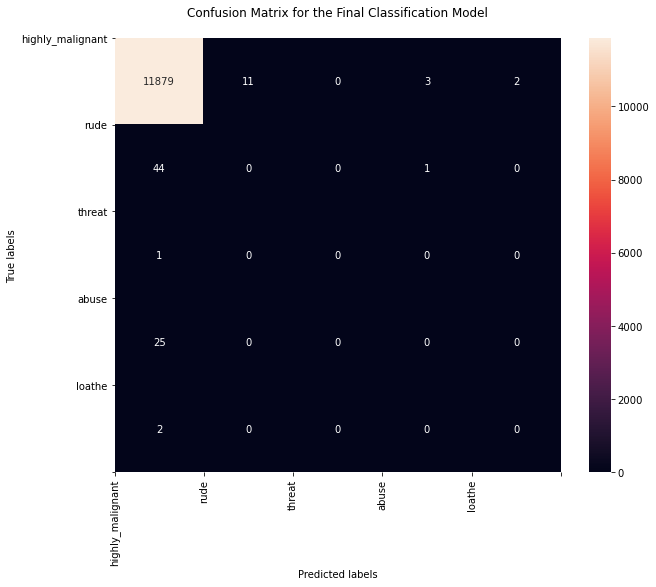

In [29]:
plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size
ax= plt.subplot()
cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(fmod_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  # annot=True to annotate cells, ftm='g' to disable scientific notation

# title, labels and ticks
ax.set_title('Confusion Matrix for the Final Classification Model\n'); 
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
loc = plticker.MultipleLocator()
ax.xaxis.set_major_locator(loc); ax.yaxis.set_major_locator(loc);
ax.set_xticklabels(comments_labels); ax.set_yticklabels(comments_labels);
plt.xticks(rotation=90); plt.yticks(rotation=0);
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my final model missed to provide the correct prediction (depicting in the black boxes).

# Model Saving or Serialization

In [30]:
# selecting the best model
best_model = trained_models['Support Vector Classifier']['trained']

# saving the best classification model
joblib.dump(best_model,open('Malignant_comments_classifier.pkl','wb'))

I am using the joblib option to save the final classification model but it can be done using pickle too.

# Preprocessing Pipeline for test dataframe

The following preprocessing pipeline is required to perform model prediction:

- Use the test dataset
- Remove null values if any
- Drop column id
- Convert comment text to lower case and replace '\n' with single space
- Keep only text data ie. a-z' and remove other data from comment text
- Remove stop words and punctuations
- Apply Stemming using SnowballStemmer
- Convert text to vectors using TfidfVectorizer
- Load saved or serialized best model
- Predict values and create a new CSV file

In [31]:
# Remove null values
if df_test.isnull().sum()[1] != 0:
    df_test.dropna(inplace=True)
    
# Drop coulmn id
df_test.drop(columns=['id'],inplace=True)

# Convert comment text to lower case and replace '\n' with single space
df_test["comment_text"] = df_test.comment_text.str.lower()
df_test["comment_text"] = df_test.comment_text.str.replace('\n',' ')

# Keep only text data i.e., a-z' and remove other data from comment text.
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

# Remove stopwords
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

# Remove punctuations
df_test.comment_text = df_test.comment_text.str.replace("[^\w\d\s]","")

# Apply Stemming using SnowballStemmer
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

print(df_test.info(memory_usage="deep"))

# Convert text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word', max_features=4000)
test_features = tfidf.fit_transform(df_test.comment_text).toarray()

# Load saved or serialized model and predict
model_loaded = joblib.load('Malignant_comments_classifier.pkl')

# Make predictions and view the results
predict_test = model_loaded.predict(test_features)

# Saving predicted values into a CSV file
pd.DataFrame(predict_test.toarray()).to_csv('Predicted_test_output.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  153164 non-null  object
dtypes: object(1)
memory usage: 37.2 MB
None


MemoryError: Unable to allocate 4.56 GiB for an array with shape (153164, 4000) and data type float64

In [32]:
df1 = pd.read_csv('Predicted_test_output.csv')
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.rename({'0':'malignant', '1':'highly_malignant', '2':'rude', '3':'threat', '4':'abuse', '5':'loathe'}, 
           axis='columns', inplace=True)
df2=df_test.copy()
df = pd.concat([df2, df1], axis=1)
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,yo bitch ja rule succes ever what hate sad mof...,0,0,0,0,0,0
1,rfc titl fine imo,0,0,0,0,0,0
2,sourc zaw ashton lapland,0,0,0,0,0,0
3,look back sourc inform updat correct form gues...,0,0,0,0,0,0
4,anonym edit articl,0,0,0,0,0,0
...,...,...,...,...,...,...,...
153159,total agre stuff noth long crap,0,0,0,0,0,0
153160,throw field home plate get faster throw cut ma...,0,0,0,0,0,0
153161,okinotorishima categori see chang agre correct...,0,0,0,0,0,0
153162,one found nation eu germani law return quit si...,0,0,0,0,0,0


In [33]:
df.to_csv('test_dataset_predictions.csv', index=False)

# Inference

> Starting with univariate analysis, with the help of count plot it was found that dataset is imbalanced with having higher number of records for normal comments than bad comments (including malignant, highly malignant, rude, threat, abuse and loathe). Also, with the help of distribution plot for comments length it was found that after cleaning most of comments length decreases from range 0-1100 to 0-900. Moving further with wordcloud it was found that malignant comments consists of words like fuck, nigger, moron, hate, suck etc. highly_malignant comments consists of words like ass, fuck, bitch, shit, die, suck, faggot etc. rude comments consists of words like nigger, ass, fuck, suck, bullshit, bitch etc. threat comments consists of words like die, must die, kill, murder etc. abuse comments consists of words like moron, nigger, fat, jew, bitch etc. and loathe comments consists of words like nigga, stupid, nigger, die, gay, cunt etc.

